# **5.02 CNNの実験**

# 【フィルターを作る】

リスト5-9

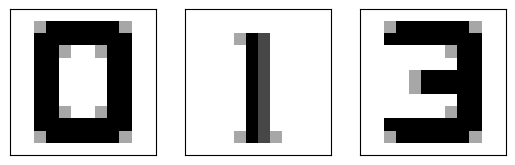

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n0 = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,9,9,9,9,9,9,9,9,0,0],
    [0,0,9,9,4,0,0,4,9,9,0,0],
    [0,0,9,9,0,0,0,0,9,9,0,0],
    [0,0,9,9,0,0,0,0,9,9,0,0],
    [0,0,9,9,0,0,0,0,9,9,0,0],
    [0,0,9,9,0,0,0,0,9,9,0,0],
    [0,0,9,9,4,0,0,4,9,9,0,0],
    [0,0,9,9,9,9,9,9,9,9,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0]])
n1 = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,4,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,4,9,7,4,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0]])
n2 = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,9,9,9,9,9,9,9,9,0,0],
    [0,0,0,0,0,0,0,4,9,9,0,0],
    [0,0,0,0,0,0,0,0,9,9,0,0],
    [0,0,0,0,4,9,9,9,9,9,0,0],
    [0,0,0,0,4,9,9,9,9,9,0,0],
    [0,0,0,0,0,0,0,0,9,9,0,0],
    [0,0,0,0,0,0,0,4,9,9,0,0],
    [0,0,9,9,9,9,9,9,9,9,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0]])
ndata = [n0, n1, n2]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(ndata[i], cmap="Greys")
    plt.xticks([])
    plt.yticks([])
plt.show()

リスト5-10

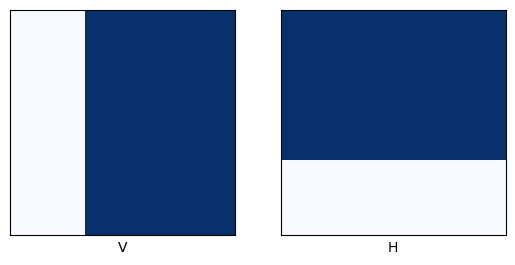

In [2]:
fV = np.array([
    [-2.0, 1.0, 1.0],
    [-2.0, 1.0, 1.0],
    [-2.0, 1.0, 1.0]])
fH = np.array([
    [1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0],
    [-2.0, -2.0, -2.0]])

for i in range(2):
    plt.subplot(1,2,i+1)
    if i == 0:
        plt.imshow(fV, cmap="Blues")
        plt.xlabel("V")
    if i == 1:
        plt.imshow(fH, cmap="Blues")
        plt.xlabel("H")
    plt.xticks([])
    plt.yticks([])
plt.show()

リスト5-11

In [3]:
vdata = []
hdata = []
vpool = []
hpool = []
def convo_img(numimg, filter):
    nx, ny = len(numimg), len(numimg[0])
    img = np.zeros((nx, ny))
    for i in range(nx - 3 + 1):
        for j in range(ny - 3 + 1):
            img[i][j] = np.sum(numimg[i:i+3, j:j+3] * filter)
    return img
def pool_img(numimg, num):
    img = []
    numimg = np.array(numimg)
    nx, ny = len(numimg), len(numimg[0])
    for i in range(0, nx, num):
        row = []
        for j in range(0, ny, num):
            row.append(np.max(numimg[i:i+num, j:j+num]))
        img.append(row)
    return img

リスト5-12

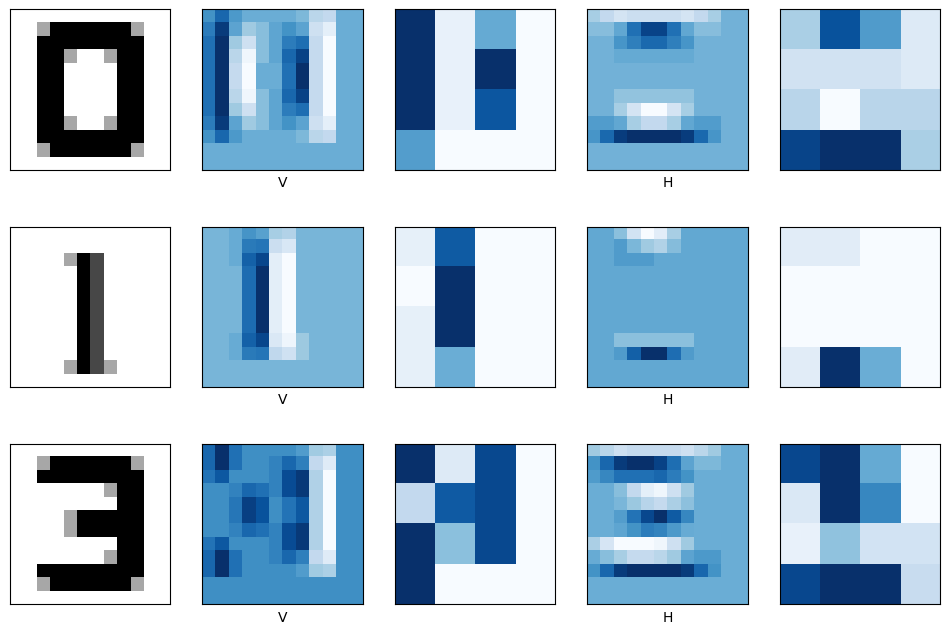

In [4]:
def cnn_test(data, num, size):
    vdata = []
    hdata = []
    vpool = []
    hpool = []
    for idx in range(num):
        vdata.append(convo_img(data[idx], fV))
        hdata.append(convo_img(data[idx], fH))
        vpool.append(pool_img(vdata[idx], size))
        hpool.append(pool_img(hdata[idx], size))

    plt.figure(figsize=(12,8))
    for idx in range(num):
        for i in range(5):
            plt.subplot(num, 5, idx*5+i+1)
            if i == 0:
                plt.imshow(data[idx], cmap="Greys")
            if i == 1:
                plt.imshow(vdata[idx], cmap="Blues")
                plt.xlabel("V")
            if i == 2:
                plt.imshow(vpool[idx], cmap="Blues")
            if i == 3:
                plt.imshow(hdata[idx], cmap="Blues")
                plt.xlabel("H")
            if i == 4:
                plt.imshow(hpool[idx], cmap="Blues")
            plt.xticks([])
            plt.yticks([])
    plt.show()

cnn_test(ndata, 3, 3)

# 【MNISTデータでテスト】

リスト5-13

11490434/11490434 [==============================] - 1s 0us/step


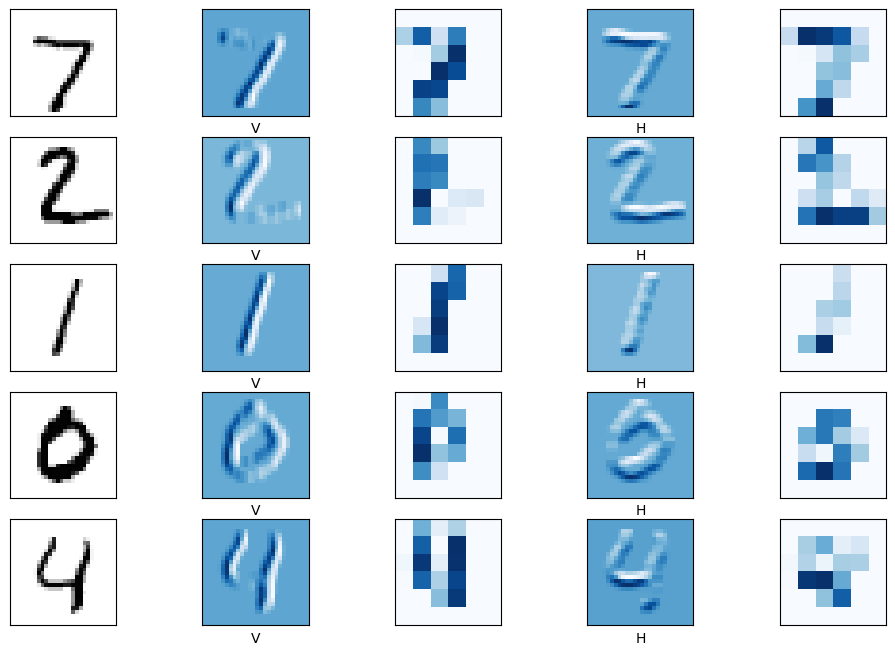

In [5]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
cnn_test(x_test, 5, 5)

リスト5-14

4422102/4422102 [==============================] - 1s 0us/step


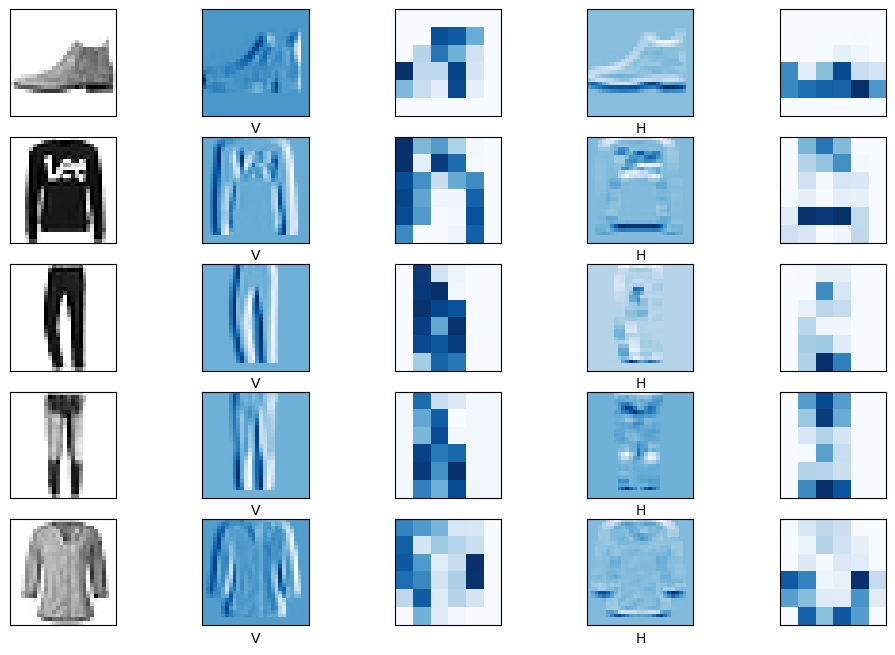

In [6]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
cnn_test(x_test, 5, 5)